# Weapons and perpetrators
This notebook delves into the critical aspects of terrorist attacks: the actors involved and the tools they employ. Understanding these elements is crucial for comprehensive analysis and informed countermeasures. We will explore the following:
- Who is making the attacks? We will identify the groups and/or individuals responsible for terrorist acts, including the names of terrorist organizations.
- What weapons are used to carry out the attacks? We will analyze the types of weapons most frequently utilized in terrorist actions. This analysis will include visualizations, specifically a bar graph, to illustrate weapon prevalence.

## Filtering Dataset
The code converts data from an Excel file into a CSV file, so that it is easier to work with the data.

In [1]:
import pandas as pd
import numpy as np

# Transform the data from xlsx to csv
# Replace 'Sheet1' with the actual sheet name from the Excel filed
df = pd.read_excel('../../data/globalterrorismdb_0522dist.xlsx', sheet_name='Data')
df.to_csv('../../data/globalterrorismdb_0522dist.csv', index=False)

## Read in data
The code reads in the CSV file we exported earlier.

In [18]:
df = pd.read_csv('../../data/globalterrorismdb_0522dist.csv', low_memory=False)

## Filter out long entries

Vehicle category is long, so it is shortened so that it can be used for the plots later on.

In [19]:
df['weaptype1_txt'] = df['weaptype1_txt'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')

# Top 20 Terrorist Groups

Each bar in the chart represents a specific terrorist group, and the length of the bar corresponds to number of incidents associated with that group.

- Terrorist Group: The y-axis (vertical axis) lists the names of various terrorist groups.
- Numerical Value: The x-axis (horizontal axis) represents the number of incidents associated with each terrorist group.
- Excluding "Unknown": Groups labeled as "Unknown" were excluded from the data, so that relevant group names are displayed.

The chart shows that the Taliban has the highest number of incidents (11,982), far more than any other group in the top 20.  ISIL follows with 7,254 incidents, and Shining Path (SL) is third with 4,564. After the top three, there's a drop-off, with the remaining groups showing a more gradual decline.  The Communist Party of India - Maoist (CPI-Maoist) is among those with the fewest incidents in the top 20.

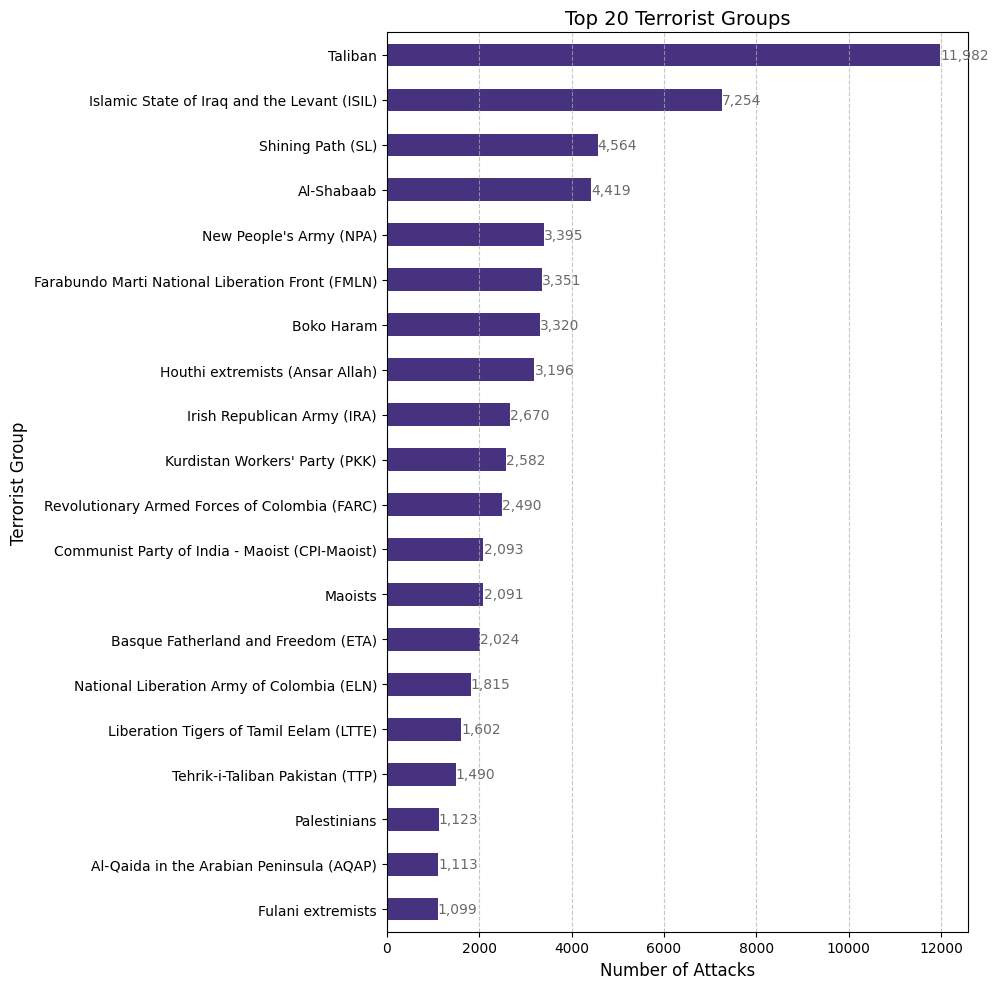

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_n_groups = 20
group_counts = df['gname'].value_counts()
filtered_groups = group_counts[group_counts.index != "Unknown"].nlargest(top_n_groups).iloc[::-1]

plt.figure(figsize=(10, 10)) 
sns.set_palette("viridis")
bars = filtered_groups.plot(kind='barh', edgecolor='none')  # Remove bar edges
plt.title(f'Top {top_n_groups} Terrorist Groups', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Terrorist Group', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a subtle horizontal grid

# Add number of data points beside each bar with better formatting
for bar in bars.patches:
    xval = bar.get_width()
    plt.text(xval + 3, bar.get_y() + bar.get_height()/2, f'{int(xval):,}', ha='left', va='center', fontsize=10, color='dimgray') # Formatted integer

plt.tight_layout()
plt.show()

# Top Weapon Types
The pie chart illustrates the distribution of weapon types employed in the reported attacks.  Less frequent weapon types have been aggregated into an "Other" category to enhance clarity.  The chart facilitates a comparative analysis of the prevalence of different weapon categories.

- Explosives represent the most substantial proportion, accounting for 49.3% of the attacks.  This indicates that explosive devices were the predominant weapon type in the dataset.
- Firearms were the second most frequently utilized weapon, observed in 32.3% of the attacks.
- A notable proportion, 9.6%, of attacks were carried out with Unknown weapon types.  This introduces an element of uncertainty into the analysis.
- Less frequently utilized weapon types, such as Incendiary and Melee weapons, constitute only minor proportions of the total.
- The “Other” category represents a negligible fraction of the attacks.

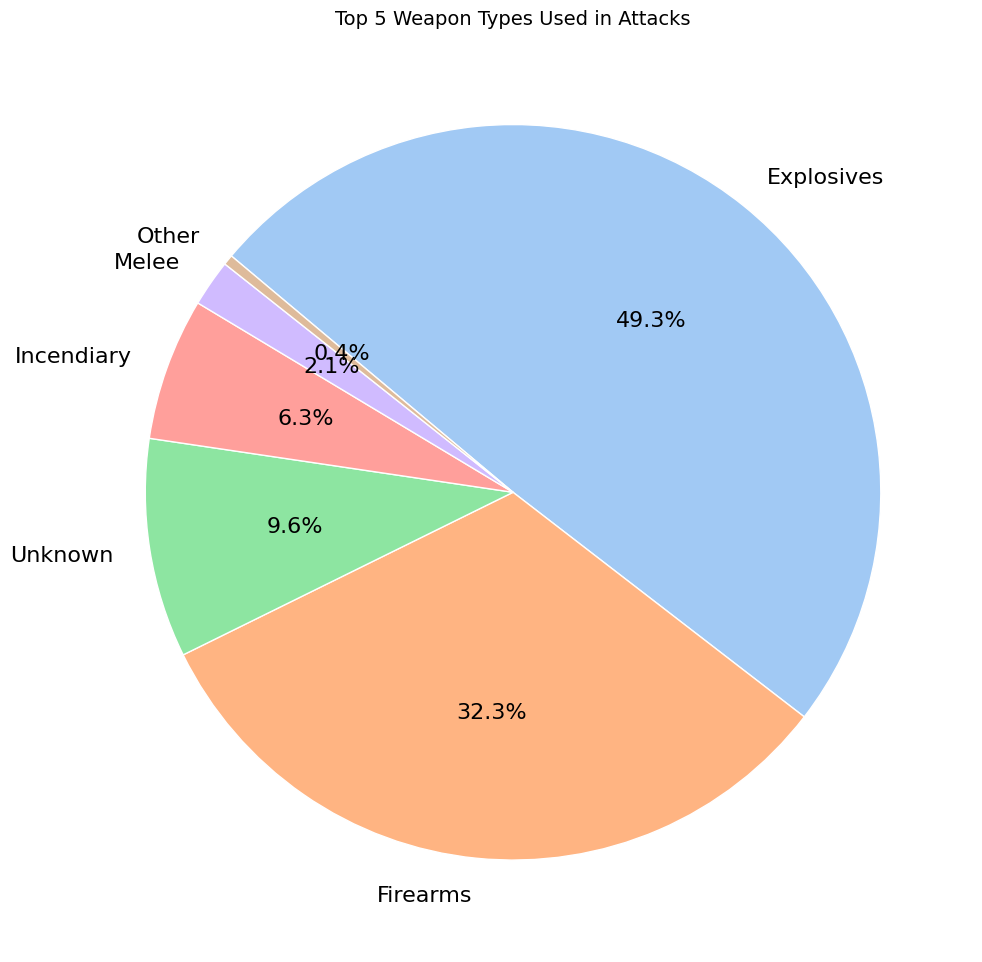

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count weapon types
weapon_counts = df['weaptype1_txt'].value_counts()

# Get top N weapon types
top_n = 5
top_weapons = weapon_counts.nlargest(top_n)

# Sum the rest as "Other"
other_total = weapon_counts.iloc[top_n:].sum()

# Combine top 5 with "Other" using pd.concat
combined_counts = pd.concat([top_weapons, pd.Series({'Other': other_total})])

# Plot
plt.figure(figsize=(10, 10))
colors = sns.color_palette("pastel", len(combined_counts))

plt.pie(combined_counts,
        labels=combined_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140,
        counterclock=False,
        wedgeprops={'edgecolor': 'white'},
        textprops={'fontsize': 16})

plt.title(f'Top {top_n} Weapon Types Used in Attacks', fontsize=14)
plt.tight_layout()
plt.show()

# Top 20 Weapon Sub-types
The bar chart presents a categorical breakdown of weapon sub-types and their corresponding frequencies of use in reported attacks. The x-axis represents the number of attacks, while the y-axis enumerates specific weapon sub-types. The bars are arranged horizontally, allowing for a comparative assessment of the prevalence of each sub-type.

- The weapon sub-types with the highest frequency of use are "Unknown Explosive Type" and "Unknown Gun Type," with 48,807 and 40,783 attacks, respectively. The substantial number of attacks attributed to these unknown categories suggests a significant gap in data granularity, which may warrant further investigation.
- Among known weapon sub-types, "Automatic or Semi-Automatic Rifle" is the most prevalent, with 18,176 attacks. This indicates the frequent use of this weapon category in violent incidents.
- "Projectiles (rockets, mortars, RPGs, etc.)" and "Vehicle" also exhibit relatively high frequencies, with 12,031 and 10,849 attacks, respectively.
- The remaining weapon sub-types, including "Other Explosive Type," "Handgun," "Grenade," and others, show a progressive decline in frequency of use.

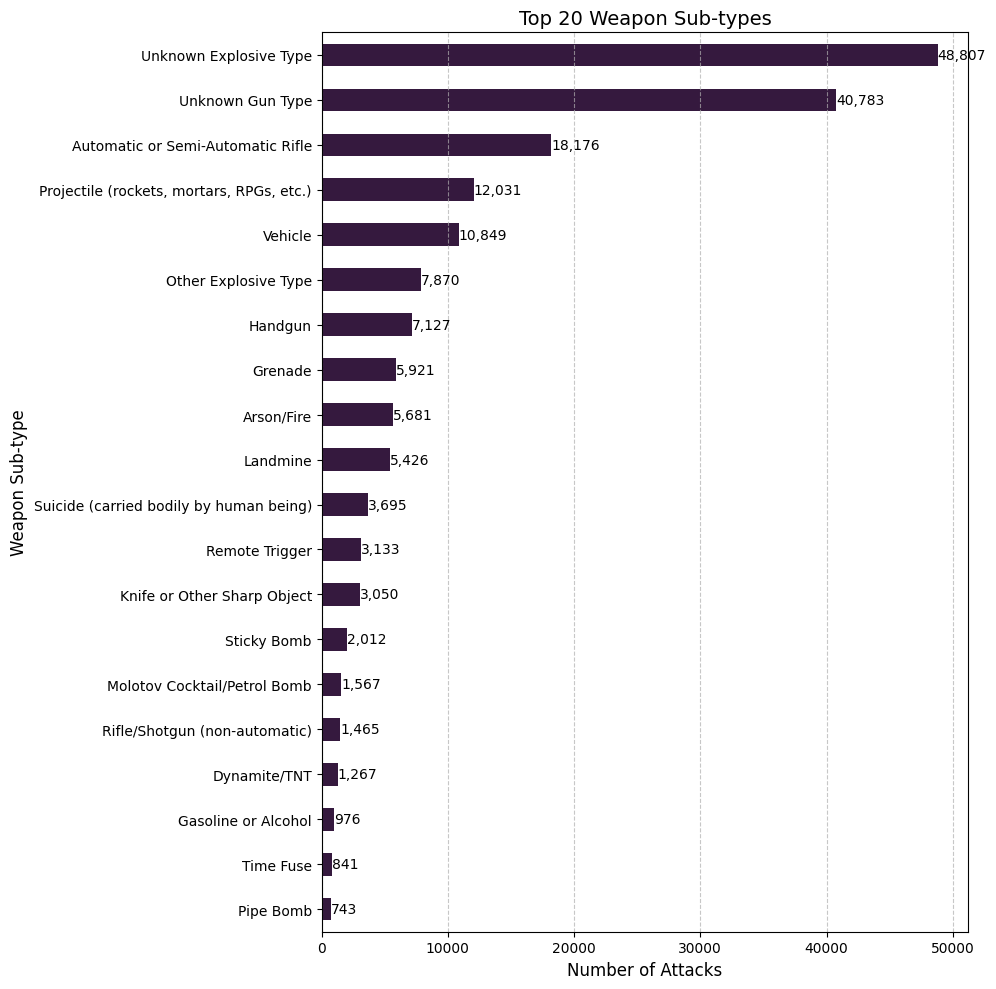

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For nicer color palettes

top_n_subtypes = 20
top_subtypes = df['weapsubtype1_txt'].value_counts().nlargest(top_n_subtypes).iloc[::-1]  # Reverse the Series

plt.figure(figsize=(10, 10)) 
sns.set_palette("rocket")  # Use Seaborn color palette
bars = top_subtypes.plot(kind='barh', edgecolor='none')  # Horizontal bars

plt.title(f'Top {top_n_subtypes} Weapon Sub-types', fontsize=14)
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Weapon Sub-type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add number of data points to the right of each bar
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 3,  # Slightly to the right of the bar
             bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}',
             ha='left', va='center',
             fontsize=10, color='black')  # Use black for visibility

plt.tight_layout()
plt.show()

# Word Cloud of Weapon Sub-types

The image presents a word cloud visualization displaying various weapon sub-types. The size of each word is proportional to its frequency of occurrence within the dataset. This visualization provides a qualitative overview of the most frequently mentioned weapon sub-types.

- Terms such as "rifle," "gun," and "explosive" appear prominently, suggesting their prevalence in the data.
- Additional observations include the presence of terms like "vehicle," "projectile," and "grenade," indicating their relevance within the dataset.
- It is important to note that the word cloud does not contain "Unknown" weapon types, as these were excluded from the analysis. This exclusion allows for a clearer focus on the distribution of known weapon sub-types.

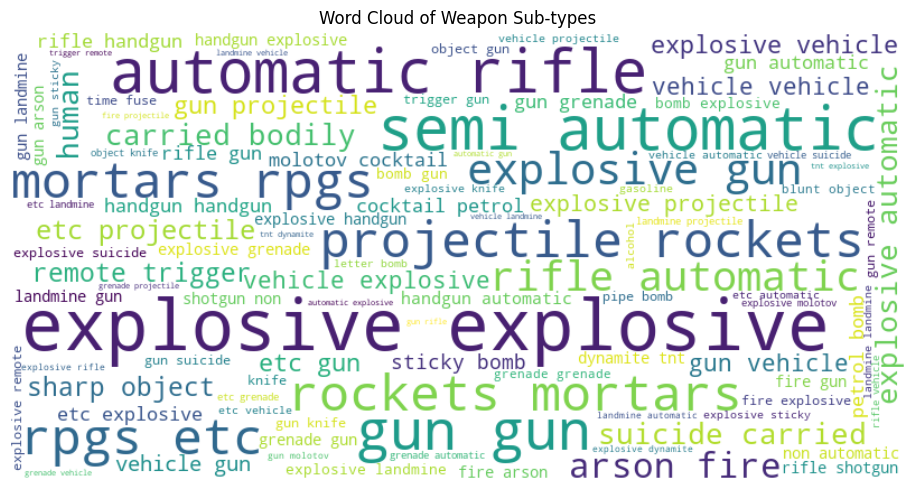

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Handle potential NaN values
weapon_subtypes_cleaned = df['weapsubtype1_txt'].dropna().astype(str)

filtered_words = []
for subtype in weapon_subtypes_cleaned:
    words = subtype.lower().split()  # Convert to lowercase and split into words
    for word in words:
        if "unknown" not in word and "type" not in word:
            filtered_words.append(word)

text = " ".join(filtered_words)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100,
    colormap="viridis",
    random_state=42,
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Weapon Sub-types')
plt.tight_layout()
plt.show()

## Weapon Types Over Time

The image displays a dynamic bar chart illustrating how the usage of different weapon types varies over time. Year 1993 is filtered out, because it has no data.

- Dynamic Interaction: The chart is interactive. You can hover over the bars to see the exact count and weapon type for a specific year.
- Time Slider: A slider allows you to adjust the year, enabling you to observe changes in weapon type usage across different years.

A notable trend observed throughout the years is the prevalence of Explosives, which consistently shows a high number of incidents, making it the most frequently used weapon type. Firearms typically follow as the second most common, while Incendiary weapons and, to a lesser extent, Melee weapons also appear with some regularity. Other weapon types such as Chemical, Sabotage Equipment, Fake Weapons, Radiological, Biological, and Other tend to be used much less frequently across the time period represented in the data.

In [24]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import (
    ColumnDataSource, Slider, NumeralTickFormatter,
    Legend, LegendItem, HoverTool, CustomJS, Range1d, Div
)
from bokeh.layouts import column
from bokeh.io import output_notebook, save, output_file
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10, Category20

# Show output in notebook
output_notebook()

# Ensure 'iyear' is integer
df['iyear'] = df['iyear'].astype(int)

# Group by year and weapon type and count occurrences
weapon_counts = df.groupby(['iyear', 'weaptype1_txt']).size().reset_index(name='count')

# Keep only years that have data
valid_years = sorted(weapon_counts['iyear'].unique().tolist())

# Get weapon types
weapon_types = weapon_counts['weaptype1_txt'].unique().tolist()
num_weapon_types = len(weapon_types)

# Choose palette
palette = Category10[num_weapon_types] if num_weapon_types <= 10 else Category20[min(num_weapon_types, 20)]

# Initial data load
initial_year = valid_years[0]
initial_data = weapon_counts[weapon_counts['iyear'] == initial_year]

# ColumnDataSource
source = ColumnDataSource(data=dict(
    years=initial_data['iyear'].tolist(),
    weapon_types=initial_data['weaptype1_txt'].tolist(),
    counts=initial_data['count'].tolist(),
))

# Create figure
p = figure(
    height=350,
    sizing_mode='stretch_width',
    title="Weapon Types Over Time",
    x_axis_label="Weapon Type",
    y_axis_label="Number of Incidents",
    x_range=weapon_types,
)
p.y_range = Range1d(start=0, end=initial_data['count'].max() * 1.1)

# Bars
bars = p.vbar(
    x='weapon_types',
    top='counts',
    width=0.9,
    source=source,
    line_color='white',
    fill_color=factor_cmap('weapon_types', palette=palette, factors=weapon_types),
)

# Legend
legend_items = [
    LegendItem(label=wtype, renderers=[bars], index=i)
    for i, wtype in enumerate(weapon_types)
]
legend = Legend(items=legend_items, location="center")
p.add_layout(legend, 'right')

# Hover tool
hover = HoverTool(
    tooltips=[
        ("Weapon Type", "@weapon_types"),
        ("Count", "@counts"),
    ],
    mode='vline',
    renderers=[bars]
)
p.add_tools(hover)

# Style
p.xgrid.grid_line_color = None
p.yaxis.formatter = NumeralTickFormatter(format="0")
p.xaxis.major_label_orientation = 0.8

# Slider (with index) and year display
year_slider = Slider(
    start=0,
    end=len(valid_years) - 1,
    step=1,
    value=0,
    title=None,  # Remove label to avoid double display
)

year_display = Div(text=f"<b>Year: {initial_year}</b>")

# JavaScript callback
callback = CustomJS(
    args=dict(
        source=source,
        weapon_counts_df=weapon_counts.to_json(orient='records'),
        y_range=p.y_range,
        year_display=year_display,
        valid_years=valid_years,
    ),
    code="""
    const data = JSON.parse(weapon_counts_df);
    const yearIndex = cb_obj.value;
    const selected_year = valid_years[yearIndex];
    const new_data = {'years': [], 'weapon_types': [], 'counts': []};
    let max_count = 0;

    for (let i = 0; i < data.length; i++) {
        if (data[i]['iyear'] === selected_year) {
            new_data['years'].push(data[i]['iyear']);
            new_data['weapon_types'].push(data[i]['weaptype1_txt']);
            new_data['counts'].push(data[i]['count']);
            if (data[i]['count'] > max_count) {
                max_count = data[i]['count'];
            }
        }
    }

    source.data = new_data;
    y_range.end = Math.ceil(max_count * 1.1);
    year_display.text = "<b>Year: " + selected_year + "</b>";
    """
)
year_slider.js_on_change('value', callback)

# Layout
layout = column(year_display, year_slider, p, sizing_mode='stretch_width')

# Show in notebook
show(layout)

output_file("weapon_types_over_time.html", title="Weapon Types Over Time")

# Save as HTML
save(layout, filename="weapon_types_over_time.html")

Loading BokehJS ...

'/Users/jonas/Documents/code/temp/socialdata2025/notebooks/jonas/weapon_types_over_time.html'

## Top Perpetrator Groups Over Time

The image displays a line graph titled "Trend of Top 10 Perpetrator Groups Over Time." This graph illustrates how the number of attacks attributed to the top 10 perpetrator groups has changed across different years. Unknown group is skipped to increase clarity.

- Dynamic Interaction: The graph is interactive. You can hover over the lines to see the exact number of attacks and the corresponding year for each group.
- Trend Visualization: The lines represent the trend for each perpetrator group over the years, allowing you to observe how their activity increases or decreases.
- Comparative Analysis: By plotting multiple groups on the same graph, it enables a comparison of their activity levels and trends.

The graph shows how the activity of different perpetrator groups has evolved over time. For example, you can observe the rise and fall of attacks by groups like the Irish Republican Army (IRA) and the Kurdistan Workers' Party (PKK) over the decades. Additionally, the graph highlights the emergence and surge in activity of groups like ISIL in more recent years. The Taliban, however, shows a noticeable presence throughout the entire period with varying levels of activity.

In [25]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter, HoverTool, Legend, LegendItem
from bokeh.layouts import column
from bokeh.io import output_notebook, output_file, save
from bokeh.palettes import Category20

# Ensure 'iyear' is an integer
df['iyear'] = df['iyear'].astype(int)

# Get the top N perpetrator groups (overall), excluding "Unknown"
top_n = 10
group_counts_all = df['gname'].value_counts()
filtered_counts = group_counts_all[group_counts_all.index != "Unknown"]
top_groups = filtered_counts.nlargest(top_n).index.tolist()
df_filtered = df[df['gname'].isin(top_groups)].copy()

# Group by year and group name, counting attacks
group_counts = df_filtered.groupby(['iyear', 'gname']).size().reset_index(name='attack_count')

# Get all unique years for the x-axis range
years = sorted(df['iyear'].unique())
min_year = min(years)
max_year = max(years)

# Create the Bokeh figure
p = figure(
    height=350,
    sizing_mode='stretch_width',
    title=f"Trend of Top {top_n} Perpetrator Groups Over Time",
    x_axis_label="Year",
    y_axis_label="Number of Attacks",
    x_range=(min_year, max_year),
)

# Add line renderers for each group and prepare for legend
palette = Category20[top_n]
legend_items = []

for i, group in enumerate(top_groups):
    group_data = group_counts[group_counts['gname'] == group]
    renderer = p.line(
        x=group_data['iyear'],
        y=group_data['attack_count'],
        line_width=2,
        color=palette[i % len(palette)],
        alpha=0.8,
    )
    legend_items.append(LegendItem(label=group, renderers=[renderer]))

# Customize appearance
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.formatter = NumeralTickFormatter(format="0")

# Add custom legend to the right
legend = Legend(items=legend_items)
p.add_layout(legend, 'right')
legend.click_policy = "hide"

# Add hover tool
hover = HoverTool(
    tooltips=[
        ("Year", "@x{0}"),
        ("Attacks", "@y"),
    ],
    mode="mouse",
)

p.add_tools(hover)

# Arrange layout (just the plot)
layout = column(p, sizing_mode='stretch_width')

# Output to Jupyter Notebook
output_notebook()
show(layout)

# Save as standalone HTML file
output_file("top_groups_over_time_static_no_unknown.html", title="Top Perpetrator Groups Over Time")
save(layout)

Loading BokehJS ...

'/Users/jonas/Documents/code/temp/socialdata2025/notebooks/jonas/top_groups_over_time_static_no_unknown.html'